This File sets up the large Multi-Modal discriminator model which is compromised of a visual model, SBERT embeddings for the textual data and fully connected layers.


MORE EXPLANATIONS

Note that the execution of this notebook requires a lot of RAM and GPU RAM!

In [1]:
!pip install transformers
!pip install miceforest
!pip install sentence_transformers
!pip install accelerate



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 58.0/58.0 kB 101.7 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.2+cu117 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
torchtext 0.11.1 requires torch==1.10.1, but you have torch 2.0.0 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.1 requires torch==1.10.1, but you have torch 2.0.1 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 172.4/172.4 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 219.1/219.1 kB 2.7 MB/s eta 0:00:00


In [8]:
!pip install opencv-python


     ---------------------------------------- 38.2/38.2 MB 9.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import torch
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
#import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report
import json 
import cv2


In [10]:
## reading in tabuar data 

import pandas as pd 
airbnb_london_filtered_images = pd.read_csv("C:/Users/Nico/Documents/Uni/Thesis/extra/discriminator_tabular_data_images.csv")


## Preparing the Visual Sub-Model 

The images shall be embedded through a pre-trained Visual Transformer Model (fine-tuned on hotel images) and thus need to be passed through the corresponding Extractor Function (e.g. for image resizing and normalization).

However, before loading in this model, I shall downsize all pictures and save the resukting arrays in a JSON to avoild having load them from Drive which solws down the training greatly!

In [18]:
id
#img_current = cv2.imread(f"C:/Users/Nico/Documents/Uni/Thesis/extra/Image_data/Image_data/img_{id}.jpg")
#img_current


67934

In [15]:
img_current

In [17]:

dict_images = {}

for idx in range(airbnb_london_filtered_images.shape[0]):
  
  print(idx/airbnb_london_filtered_images.shape[0])

  id = airbnb_london_filtered_images.id[idx]
  img_current = cv2.imread(f"C:/Users/Nico/Documents/Uni/Thesis/extra/Image_data/Image_data/img_{id}.jpg")
  img_current = cv2.cvtColor(img_current,cv2.COLOR_BGR2RGB)
  img_current = cv2.resize(img_current,(224,224))

  dict_images[int(id)] = img_current.tolist() 

  if idx % 200 == 0:
    x = json.dumps(dict_images)
    with open("C:/Users/Nico/Documents/Uni/Thesis/extra/json_images.json", 'w') as f:
      f.write(x)

x = json.dumps(dict_images)
with open("C:/Users/Nico/Documents/Uni/Thesis/extra//json_images.json", 'w') as f:
  f.write(x)

0.0
4.4306601683650866e-05
8.861320336730173e-05
0.00013291980505095258
0.00017722640673460346
0.00022153300841825432
0.00026583961010190517
0.0003101462117855561
0.0003544528134692069
0.0003987594151528578
0.00044306601683650863
0.0004873726185201595
0.0005316792202038103
0.0005759858218874612
0.0006202924235711121
0.000664599025254763
0.0007089056269384139
0.0007532122286220647
0.0007975188303057156
0.0008418254319893664
0.0008861320336730173
0.0009304386353566681
0.000974745237040319
0.0010190518387239698
0.0010633584404076207


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# for some reason, this fails the first time and gets executed only on the second run ...

path = '/content/gdrive/My Drive/Thesis/Image_data/json_images.json'

with open(path, "r") as read_file:
    image_dict = json.load(read_file)

In [ ]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification, TFViTModel

extractor = AutoFeatureExtractor.from_pretrained("faisalabidi/hotel-image-classifier")
visual_model = AutoModelForImageClassification.from_pretrained("faisalabidi/hotel-image-classifier")


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [8]:
(224*224)/(70*70)


10.24

In [ ]:
print(extractor)

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



This function applies padding to map the image to a 244 * 244 dimension. This has however not been found to have an effect on the predictive quality of the discrininator models which rely on the extractor and the corresponding model.

In [ ]:
print(visual_model)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

The last layer is only used for classification purposes (i.e. mapping to 11 classes) and shall thus not be used here.

In [ ]:
model_vit = visual_model.vit 

## Preparing the Textual Sub-Model

After experimentation with different models, including task-related pretrained models, I have decided to go with an SBERT model for the encoding of both the Name and the description. Also, I found that having a joint description of both the actual description and the space description works best. This also works because the joint description does not exceed the maximum number of input tokens.

In [ ]:
from sentence_transformers  import SentenceTransformer

text_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')


In [ ]:
text_model = text_model.to("cuda") ## already here so that an efficient collate batch fuunction can be set up ( see below)

## Discriminator Approach 1)  Training on Sparse Data



Setting up a (rather sparse) DF for which the variable selection is motivated by other papers trying to work out what influences a listings' succes.
E.g. this DF does not include the Sub Review Scores (lie Review Scores on location, communication etc) and the binary variables for the amenities.

The variable 'host acceptance rate' might also be interesting but contains more than 50% NA.

I shall refrain from normilzation becasue the values in the numeric columns are within a certain range (like e.g. for beds, bedrooms, reviews etc.)

The id column is also passed to the DFto identify and load images later on.


In [ ]:
sparse_columns = ['id', 'name', 'description', 'neighborhood_overview', 'in_inner_boundary', 'host_is_superhost', 'host_identity_verified', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'number_of_reviews', 'len_amenities', 'in_inner_boundary', 'proxy', 'review_diff']
airbnb_london_filtered_images_sparse = airbnb_london_filtered_images[sparse_columns]

In [ ]:
airbnb_london_filtered_images_sparse.isna().sum()

id                           0
name                         0
description                  0
neighborhood_overview     6828
in_inner_boundary            0
host_is_superhost            0
host_identity_verified       0
room_type                    0
accommodates                 0
bedrooms                   976
beds                       267
price                        0
minimum_nights               0
maximum_nights               0
review_scores_rating        67
number_of_reviews            0
len_amenities                0
in_inner_boundary            0
proxy                        0
review_diff                  0
dtype: int64

Dealing with missing data

* Replacing NaNs in Space description with text that indicates no given information!
* FOr the reiview scores, the data points shall just be dropped as this variable is hard to infer from the others and only very few data points are affected!
* For other tabular, continuous varables with missing values, ML-based imputation using Light GB and MICE (Multiple Imputation by Chained Equation) shall be deployed (https://pypi.org/project/miceforest/)



In [ ]:
airbnb_london_filtered_images_sparse = airbnb_london_filtered_images_sparse[airbnb_london_filtered_images_sparse.review_scores_rating.isna() == False]

In [ ]:
airbnb_london_filtered_images_sparse.neighborhood_overview = airbnb_london_filtered_images_sparse.neighborhood_overview.fillna("No description")
airbnb_london_filtered_images_sparse["joint_description"] = airbnb_london_filtered_images_sparse.description + " . " + airbnb_london_filtered_images_sparse.neighborhood_overview


In [ ]:
## are the listings that contin neither bedroom nor bathroom info the same? 
print(airbnb_london_filtered_images_sparse[(airbnb_london_filtered_images_sparse.beds.isna()==True)  &  (airbnb_london_filtered_images_sparse.bedrooms.isna()==True)].shape[0])


26


In [ ]:
airbnb_london_filtered_images_sparse.room_type = cat_to_numeric(airbnb_london_filtered_images_sparse.room_type).astype("int")
df_imputed = apply_gbm_impute(airbnb_london_filtered_images_sparse[['room_type', 'accommodates', 'bedrooms', 'beds']], 5)

In [ ]:
airbnb_london_filtered_images_sparse["bedrooms"] = df_imputed["bedrooms"]
airbnb_london_filtered_images_sparse["beds"] = df_imputed["beds"]


In [ ]:
# from categorical to numeric
airbnb_london_filtered_images_sparse.host_is_superhost = cat_to_numeric(airbnb_london_filtered_images_sparse.host_is_superhost).astype("int")
airbnb_london_filtered_images_sparse.host_identity_verified = cat_to_numeric(airbnb_london_filtered_images_sparse.host_identity_verified).astype("int")



In [ ]:
airbnb_london_filtered_images_sparse_train = airbnb_london_filtered_images_sparse.sample(n = int( np.ceil(0.7*airbnb_london_filtered_images_sparse.shape[0])), random_state = 100)
airbnb_london_filtered_images_sparse_eval = airbnb_london_filtered_images_sparse.drop(airbnb_london_filtered_images_sparse_train.index, axis = 0)

In [ ]:
len(airbnb_london_filtered_images_sparse_train.columns)


21

In [ ]:
data_sparse_train = Simple_Dataset(airbnb_london_filtered_images_sparse_train)
data_sparse_eval = Simple_Dataset(airbnb_london_filtered_images_sparse_eval)


In [ ]:
def collate_batch_sparse(batch):

  list_images = []   # for the images passed through extractor function 
  tabular_list = []
  list_proxies = []
  list_review_diff = []
  list_name = []
  list_joint_description = []
  list_ids = []

  for data in batch:

    # indexing the image pixels form the dict
    list_images.append( extractor(torch.tensor(image_dict[str(data[0])]))['pixel_values'][0] )
    list_ids.append(data[0]) # for saving the predictions

    list_name.append(text_model.encode(data[1]))
    
    tabular_list.append(data[4:18]) ## locations of tabular data 
    if int(data[18]) == 1:  ## location of categorical proxy variable 
      list_proxies.append([1,0,0])
    elif int(data[18]) == 2: 
      list_proxies.append([0,1,0])
    elif int(data[18]) == 3:
      list_proxies.append([0,0,1])
 
    list_review_diff.append(data[19])  ## location of cont. review diff variable
    list_joint_description.append(text_model.encode(data[20]))

  list_images  = torch.tensor(list_images, dtype=torch.float32)
  tabular_list = torch.tensor(tabular_list, dtype=torch.float32)
  list_proxies = torch.tensor(list_proxies, dtype=torch.float32)

  return list_images, list_name, list_joint_description, tabular_list, list_proxies, list_review_diff, list_ids
  

# images, names, des, tabular data, proxies, review_diff, ids  


In [ ]:
dl_train = DataLoader(dataset=data_sparse_train, collate_fn=collate_batch_sparse, batch_size=64, shuffle=True)
dl_eval = DataLoader(dataset=data_sparse_eval, collate_fn=collate_batch_sparse, batch_size=32, shuffle=False)


In [ ]:
## param freezing alredy here ?!

for param in text_model.parameters():
  param.requires_grad = False

for param in model_vit.parameters():
  param.requires_grad = False


In [ ]:
## simple neural net -- tabular inputs --> review_diff 

import torch
from torch import nn
from torch import optim

tab_input_dim = 14
final_output_dim_text_name = 5
final_output_dim_text_des = 5
final_output_dim_visual = 5


hidden_dim_1 = 60
hidden_dim_2 = 60
hidden_dim_3 = 60
hidden_dim_4 = 20
output_dim = 1


## name, des / text model 


class NeuralNetwork(nn.Module): ## without extractor
    def __init__(self, model_vit, tab_input_dim, final_output_dim_visual, final_output_dim_text_name, final_output_dim_text_des, hidden_dim_1, hidden_dim_2, hidden_dim_3, hiddem_dim_4, output_dim):
        super(NeuralNetwork, self).__init__()

        self.model_vit = model_vit
        for param in self.model_vit.parameters():
          param.requires_grad = False

        # layers build on top of visual model before concatination 
        self.visual_add_layer_1 = torch.nn.Linear(in_features=768, out_features=20, bias=True)
        self.visual_add_layer_2 = torch.nn.Linear(in_features=20, out_features=4, bias=True)
        # flattening / torch.flatten(-, start_dim = 1)
        self.visual_add_layer_3 = torch.nn.Linear(in_features=788, out_features=50, bias=True)
        self.visual_add_layer_4 = torch.nn.Linear(in_features=50, out_features=final_output_dim_visual, bias=True) ## concat after this layer of dim Batch Size x final_output_dim_visual
        

        # Layers added after Name/Title 
        self.name_added_layer_1 = nn.Linear(768, 100, bias=True)
        self.name_added_layer_2 = nn.Linear(100, 100, bias=True)
        ### dropout ## 
        self.name_added_layer_3 = nn.Linear(100, 50, bias=True)
        self.name_added_layer_4 = nn.Linear(50, final_output_dim_text_name, bias=True)

        # Layers added after Description 
        self.des_added_layer_1 = nn.Linear(768, 100, bias=True)
        self.des_added_layer_2 = nn.Linear(100, 100, bias=True)
        ### dropout ## 
        self.des_added_layer_3 = nn.Linear(100, 50, bias=True)
        self.des_added_layer_4 = nn.Linear(50, final_output_dim_text_des, bias=True)


        ### Layers added after Joint Description ### 

        # dimension after concat operation
        self.concat_dim = tab_input_dim + final_output_dim_visual + final_output_dim_text_name + final_output_dim_text_des

        # layers processing input after concatination 
        self.layer_1 = nn.Linear(self.concat_dim, hidden_dim_1)
        self.layer_2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.layer_3 = nn.Linear(hidden_dim_2, hidden_dim_3)
        self.layer_4 = nn.Linear(hidden_dim_3, hidden_dim_4)
        self.layer_5 = nn.Linear(hidden_dim_4, output_dim)
        self.dropout = nn.Dropout(0.02) 

       
    def forward(self, img, name_encoded, des_encoded, X):  ## name, des

        ## firstly processing outputs of visual and textual model ##

        # visual model 
        output_img = self.model_vit(img)
        output_img = self.visual_add_layer_1(output_img.last_hidden_state)
        output_img = self.dropout(output_img)
        output_img = self.visual_add_layer_2(output_img)
        output_img = torch.flatten(output_img, start_dim = 1)
        output_img = self.visual_add_layer_3(output_img)
        final_output_img = self.visual_add_layer_4(output_img)

        # textual - description 
        encoded_des = torch.tensor(des_encoded)
        encoded_des = self.des_added_layer_1(encoded_des)
        encoded_des = self.dropout(encoded_des)
        encoded_des = self.des_added_layer_2(encoded_des)
        encoded_des = self.dropout(encoded_des)
        encoded_des = self.des_added_layer_3(encoded_des)
        final_encoded_des = self.des_added_layer_4(encoded_des)

        # textual - Name 
        encoded_name = torch.tensor(name_encoded)
        encoded_name = self.name_added_layer_1(encoded_name)
        encoded_name = self.dropout(encoded_name)
        encoded_name = self.name_added_layer_2(encoded_name)
        encoded_name = self.name_added_layer_3(encoded_name)
        final_encoded_name = self.name_added_layer_4(encoded_name)


        # concatination #
        x = torch.cat((final_output_img, final_encoded_name, final_encoded_des, X), 1)

        ## processing of joint representation ## 
        x = torch.nn.functional.tanh(self.layer_1(x))
        x = torch.nn.functional.tanh(self.layer_2(x))
        x = self.dropout(x)
        x = torch.nn.functional.tanh(self.layer_3(x))
        x = torch.nn.functional.tanh(self.layer_4(x))
        x = self.layer_5(x)

        return x

### Training a NN with continuous outcome variable Review Diff

In [ ]:
output_dim = 1 ## here
model = NeuralNetwork( model_vit, tab_input_dim, final_output_dim_visual, final_output_dim_text_name, final_output_dim_text_des, hidden_dim_1, hidden_dim_2, hidden_dim_3, hidden_dim_4, output_dim)

learning_rate = 0.0005
loss_fn = nn.MSELoss() ## BCE IN case of proxy 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) ## adam

In [ ]:
from transformers import get_scheduler

accelerator = Accelerator()
model, optimizer, dl_train, dl_eval = accelerator.prepare(
    model, optimizer, dl_train, dl_eval
)

num_update_steps_per_epoch = len(dl_train)
num_epochs = 100

num_training_steps = num_epochs * num_update_steps_per_epoch


lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,     ## one might also alter this!
    num_training_steps=num_training_steps,
)


device = "cuda"
model = model.to(device)

In [ ]:

overall_loss_values = []
overall_loss_values_eval = []


progress_bar = tqdm(range(num_training_steps))

for epoch in range(num_epochs):

  loss_values = []
  loss_values_eval = []

  model.train()

  for batch in dl_train:

    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[5]).to(device)
    pred = model(img, name, joint_des, X)
    loss = loss_fn(pred.squeeze(), Y)
    loss_values.append(loss.item())
    accelerator.backward(loss)

    optimizer.step()
    lr_scheduler.step()
    progress_bar.update(1)

  model.eval()

  with torch.no_grad():
    for batch in dl_eval:

      img = batch[0].to(device)
      name = torch.tensor(batch[1]).to(device)
      joint_des = torch.tensor(batch[2]).to(device)
      X = batch[3].to(device)
      Y = torch.tensor(batch[5]).to(device)
      pred = model(img, name, joint_des, X)
      loss = loss_fn(pred.squeeze(), Y)
      loss_values_eval.append(loss.item())

  overall_loss_values.append(np.mean(loss_values))
  overall_loss_values_eval.append(np.mean(loss_values_eval))

#  print(f"Iteration No {str(epoch + 1)}")
#  print(f"Train Loss: {str(np.mean(loss_values))}")
#  print(f"Eval Loss: {str(np.mean(loss_values_eval))}")
#  print("---------------------")


In [ ]:
#saving the model 
model_save_name = 'discriminator_sparse_1_cont.pth'

path ="/content/gdrive/My Drive/Thesis/Models/{}".format(model_save_name)
torch.save(model, path)


In [ ]:
name_to_save = "losses_disc_1_cont"
df_losses_1 = pd.DataFrame({"loss_eval": overall_loss_values_eval, "loss_train": overall_loss_values })
df_losses_1.to_csv(f"/content/gdrive/My Drive/Thesis/loss_data/{name_to_save}.csv", index = False)

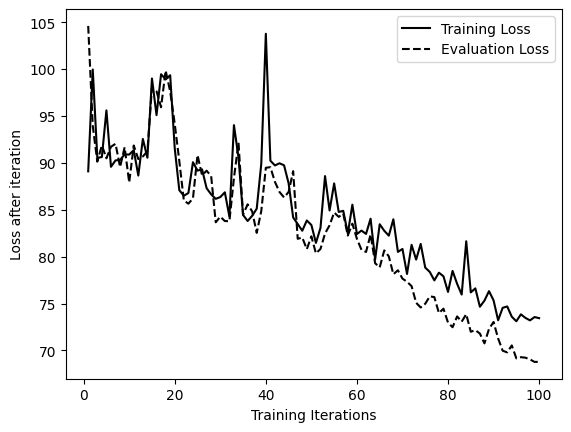

In [ ]:
# over  epochs 
## plotting loss 
import matplotlib.pyplot as plt
name_to_save = "losses_discriminator_1_cont"

epochs = list(range(1,num_epochs+1))

plt.plot(epochs, overall_loss_values, color = "black")
plt.plot(epochs, overall_loss_values_eval, color = "black", linestyle='dashed')
plt.legend(["Training Loss", "Evaluation Loss"], loc='upper right')
plt.xlabel("Training Iterations")
plt.ylabel("Loss after iteration")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/{name_to_save}.png')
plt.show()

In [ ]:
## also saving predictions with real names!


ids = []
preds = []

with torch.no_grad():
  for batch in dl_eval:

    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[5]).to(device)
    pred = model(img, name, joint_des, X)
    
    ids.extend(batch[0])
    preds.extend(pred.cpu().numpy() )
    

pred_disc_1_cont_real_name = pd.DataFrame({"id": ids, "pred": preds})
pred_disc_1_cont_real_name.to_csv("/content/gdrive/My Drive/Thesis/Discriminator_Predictions/pred_disc_1_cont_real_name.csv", index = False)

#### Training Model with categorical outcome 

In [ ]:
## again but with 3-fold categorical output 
output_dim =3
model = NeuralNetwork( model_vit, tab_input_dim, final_output_dim_visual, final_output_dim_text_name, final_output_dim_text_des, hidden_dim_1, hidden_dim_2, hidden_dim_3, hidden_dim_4, output_dim)

learning_rate = 0.003
loss_fn = nn.CrossEntropyLoss() ## automatically integrates softmax calculation
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) ## adam

In [ ]:
from transformers import get_scheduler

accelerator = Accelerator()
model, optimizer, dl_train, dl_eval = accelerator.prepare(
    model, optimizer, dl_train, dl_eval
)

num_update_steps_per_epoch = len(dl_train)
num_epochs = 100

num_training_steps = num_epochs * num_update_steps_per_epoch

lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,     ## one might also alter this!
    num_training_steps=num_training_steps,
)

device = "cuda"
model = model.to(device)

In [ ]:

overall_loss_values = []
overall_loss_values_eval = []

all_loss_values = []
all_loss_values_eval = []

progress_bar = tqdm(range(num_training_steps))

for epoch in range(num_epochs):

  loss_values = []
  loss_values_eval = []


  model.train()

  for batch in dl_train:

    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[4]).to(device)   # index = 4 for cat outcome
    pred = model(img, name, joint_des, X)
    loss = loss_fn(pred.squeeze(), Y)
    loss_values.append(loss.item())
    optimizer.zero_grad()

    all_loss_values.append(loss.item())
    loss.backward()
    optimizer.step()
    lr_scheduler.step()
    progress_bar.update(1)

   # print(f"Train loss mean: {str(np.mean(all_loss_values))}" )


  model.eval()

  with torch.no_grad():
    for batch in dl_eval:

      img = batch[0].to(device)
      name = torch.tensor(batch[1]).to(device)
      joint_des = torch.tensor(batch[2]).to(device)
      X = batch[3].to(device)
      Y = torch.tensor(batch[4]).to(device)

      pred = model(img, X)
      optimizer.zero_grad()
      pred = model(img, name, joint_des, X)
      loss = loss_fn(pred.squeeze(), Y)
      loss_values_eval.append(loss.item())
      all_loss_values_eval.append(loss.item())

  overall_loss_values.append(np.mean(loss_values))
  overall_loss_values_eval.append(np.mean(loss_values_eval))

#  print(f"Iteration No {str(epoch + 1)}")
#  print(f"Train Loss: {str(np.mean(loss_values))}")
#  print(f"Eval Loss: {str(np.mean(loss_values_eval))}")
#  print("---------------------")


In [ ]:
#saving the model 
model_save_name = 'discriminator_sparse_1_cat.pth'

path ="/content/gdrive/My Drive/Thesis/Models/{}".format(model_save_name)
torch.save(model, path)


In [ ]:
name_to_save = "losses_disc_1_cat"
df_losses_1 = pd.DataFrame({"loss_eval": overall_loss_values, "loss_train": overall_loss_values_eval })
df_losses_1.to_csv(f"/content/gdrive/My Drive/Thesis/loss_data/{name_to_save}.csv", index = False)

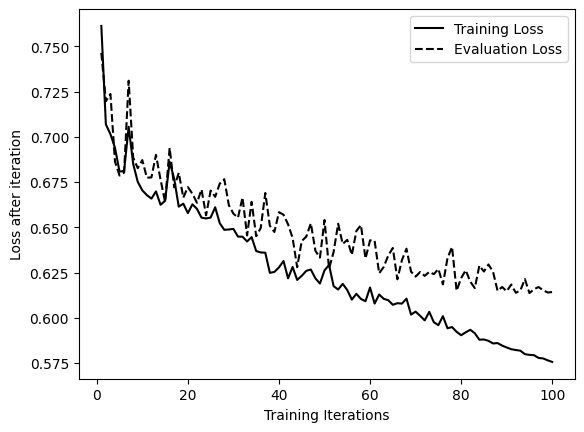

In [ ]:
# over  epochs 
## plotting loss 
import matplotlib.pyplot as plt
name_to_save = "losses_discriminator_1_cat"

epochs = list(range(1,num_epochs+1))

plt.plot(epochs, overall_loss_values, color = "black")
plt.plot(epochs, overall_loss_values_eval, color = "black", linestyle='dashed')
plt.legend(["Training Loss", "Evaluation Loss"], loc='upper right')
plt.xlabel("Training Iterations")
plt.ylabel("Loss after iteration")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/{name_to_save}.png')
plt.show()

In [ ]:

## saving predictions with real name

ids = []
preds = []

with torch.no_grad():
  for batch in dl_eval:

    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[5]).to(device)
    pred = model(img, name, joint_des, X)
    cat_pred = [i+1 for i in np.argmax(pred.cpu().numpy(), axis = 1)]  ## adding +1 since proxy is encoded as 1,2,3  , not 0,1,2

    ids.extend(batch[0])
    preds.extend(cat_pred)



In [ ]:
pred_disc_1_cat_real_name = pd.DataFrame({"id": ids, "pred": preds})
pred_disc_1_cat_real_name.to_csv("/content/gdrive/My Drive/Thesis/Discriminator_Predictions/pred_disc_1_cat_real_name.csv", index = False)

In [ ]:
### obtaining classification report 

argmax_labels = []
argmax_preds = []
labels = [0,1,2]

with torch.no_grad():
  for batch in dl_eval:
    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[5]).to(device)
    pred = model(img, name, joint_des, X)
    argmax_labels.extend( list(np.argmax(Y.numpy(), axis = 1) ))    
    argmax_preds.extend( list(np.argmax(pred.numpy(), axis = 1) ))  

report = classification_report(y_true=argmax_labels, y_pred=argmax_preds, labels=labels, output_dict = True)
print(report['weighted avg'])


{'precision': 0.6947948972654936, 'recall': 0.7570521341013144, 'f1-score': 0.7167970210922702, 'support': 6771}


<ipython-input-58-6a7462072968>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(batch[idx_output])


## Discriminator Approach 2) Letting the model decide on which features to use 

As an alternative to the first approach, I shall let a model decide on the most important tabluar features to include the the multi-modal model. More specifically, a Lasso Regression with increasing lambda is run to determine these features. These are then used in the MM Model alongside the main image, the name and the joint description.

In [ ]:
## listing all potential logical tabular confounders
 
#print(airbnb_london_filtered_images.columns[:60])
#print(airbnb_london_filtered_images.columns[60:])


## list of these - including other variabls that will be needed later on like id, name, outcome variables ... 
pot_confounders = ['id', 'name', 'description', 'neighborhood_overview',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'in_inner_boundary', 'price_per_accomodate',
       'has_amenity_Wifi', 'has_amenity_Essentials', 'has_amenity_Kitchen',
       'has_amenity_Heating', 'has_amenity_Smoke alarm', 'has_amenity_Washer',
       'has_amenity_Hangers', 'has_amenity_Long term stays allowed',
       'has_amenity_Iron', 'has_amenity_Hair dryer', 'has_amenity_Shampoo',
       'has_amenity_Hot water', 'has_amenity_Carbon monoxide alarm',
       'has_amenity_Dishes and silverware', 'has_amenity_Refrigerator',
       'has_amenity_TV', 'has_amenity_Cooking basics',
       'has_amenity_Bed linens', 'has_amenity_Oven', 'has_amenity_Microwave',
       'has_amenity_Dryer', 'has_amenity_Stove', 'has_amenity_First aid kit',
       'has_amenity_Fire extinguisher', 'has_amenity_Coffee maker',
       'has_amenity_Dishwasher', 'has_amenity_Private entrance',
       'has_amenity_Extra pillows and blankets', 'has_amenity_Elevator',
       'has_amenity_Host greets you', 'has_amenity_Free parking on premises',
       'len_amenities', 'len_description', 'proxy', 'review_diff']

In [ ]:
airbnb_london_filtered_images_pot_conf = airbnb_london_filtered_images[pot_confounders]


Checking for NaNs to know which columns are unusable andd fir which dropping these are imputing might make sense

In [ ]:
print(airbnb_london_filtered_images_pot_conf.isna().sum()[0:30])
print(airbnb_london_filtered_images_pot_conf.isna().sum()[30:])


id                                  0
name                                0
description                         0
neighborhood_overview            6828
host_response_time              12233
host_response_rate              12233
host_acceptance_rate            10998
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
neighbourhood_cleansed              0
neighbourhood_group_cleansed    22570
room_type                           0
accommodates                        0
bathrooms                       22570
bedrooms                          976
beds                              267
price                               0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
number_of_reviews_ltm               0
review_scores_rating               67
review_scores_accuracy            657
review_scores_cleanliness         650
review_scores_checkin             683
review_score

I shall drop thoe variables with an extremely high number of NaNs as these are too many to impute and that would introduce too much noise. Also, I shall drop the variavbes concering the reviews like review_scores_accuracy etc as these are hard to impute from other vriables (unlike e.g. beds for which variables like the number of accomodates or the number of bedrooms are good indicators).

In [ ]:
to_drop = ["host_response_time","host_response_rate","host_acceptance_rate",
  "neighbourhood_group_cleansed", "bathrooms", "review_scores_accuracy",
  "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
  "review_scores_location","review_scores_value"]


airbnb_london_filtered_images_pot_conf = airbnb_london_filtered_images_pot_conf.drop(to_drop, axis = 1)

In [ ]:
## once again imputing for beds and bedrooms 

airbnb_london_filtered_images_pot_conf.room_type = cat_to_numeric(airbnb_london_filtered_images_pot_conf.room_type).astype("int")
df_imputed = apply_gbm_impute(airbnb_london_filtered_images_pot_conf[['room_type', 'accommodates', 'bedrooms', 'beds']], 5)

airbnb_london_filtered_images_pot_conf["bedrooms"] = df_imputed["bedrooms"]
airbnb_london_filtered_images_pot_conf["beds"] = df_imputed["beds"]


In [ ]:
## taking care of nans in neighborhood descritiotn and coding joint description variable 

airbnb_london_filtered_images_pot_conf.neighborhood_overview = airbnb_london_filtered_images_pot_conf.neighborhood_overview.fillna("No description")
airbnb_london_filtered_images_pot_conf["joint_description"] = airbnb_london_filtered_images_pot_conf.description + " . " + airbnb_london_filtered_images_pot_conf.neighborhood_overview

Variables reviews_per_month and review_scores_rating might both be important aand hard to imput. Lets see if the NaNs in both variables (same number!) corrrelate      

In [ ]:
## correlation of reviews_per_month and review_scores_rating             

airbnb_london_filtered_images_pot_conf.reviews_per_month[airbnb_london_filtered_images_pot_conf.review_scores_rating.isna() == True].isna().sum()

# So perfect correlation in the NaNs -> dropping these datapoints


67

In [ ]:
airbnb_london_filtered_images_pot_conf = airbnb_london_filtered_images_pot_conf[airbnb_london_filtered_images_pot_conf.review_scores_rating.isna() == False]

Examining the data types and which categorical variables need to be mapped to continuous

In [ ]:
airbnb_london_filtered_images_pot_conf.dtypes

id                                          int64
name                                       object
description                                object
neighborhood_overview                      object
host_is_superhost                          object
host_listings_count                       float64
host_identity_verified                     object
neighbourhood_cleansed                     object
room_type                                   int64
accommodates                              float64
bedrooms                                  float64
beds                                      float64
price                                     float64
minimum_nights                            float64
maximum_nights                            float64
number_of_reviews                         float64
number_of_reviews_ltm                     float64
review_scores_rating                      float64
reviews_per_month                         float64
in_inner_boundary                           int64


In [ ]:
airbnb_london_filtered_images_pot_conf.host_is_superhost = cat_to_numeric(airbnb_london_filtered_images_pot_conf.host_is_superhost).astype("int")
airbnb_london_filtered_images_pot_conf.host_identity_verified = cat_to_numeric(airbnb_london_filtered_images_pot_conf.host_identity_verified).astype("int")

<ipython-input-20-d87fdc14e479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_london_filtered_images_pot_conf.host_is_superhost = cat_to_numeric(airbnb_london_filtered_images_pot_conf.host_is_superhost).astype("int")
<ipython-input-20-d87fdc14e479>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_london_filtered_images_pot_conf.host_identity_verified = cat_to_numeric(airbnb_london_filtered_images_pot_conf.host_identity_verified).astype("int")


In [ ]:
dummies_neighborhood = pd.get_dummies(airbnb_london_filtered_images_pot_conf.neighbourhood_cleansed)


In [ ]:
# dropping object oof neighborhoods 
airbnb_london_filtered_images_pot_conf = airbnb_london_filtered_images_pot_conf.drop("neighbourhood_cleansed", axis = 1 )

# concatiinating 
airbnb_london_filtered_images_pot_conf = pd.concat([airbnb_london_filtered_images_pot_conf, dummies_neighborhood], axis = 1)

Now using lasso regressions combined with grid search and cross validation and an increasing regularization hyper-parameter to figure out which feature combination yields to best out-of-sample fit. I shall ose the continuous review difference variable as the couome variable to 

In [ ]:
## dropping non-tabukar data and outcomes
X = airbnb_london_filtered_images_pot_conf.drop(['id', 'name', 'description', 'neighborhood_overview', 'joint_description','proxy', 'review_diff'], axis = 1)
Y_1 = airbnb_london_filtered_images_pot_conf["review_diff"]

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

# very fine-grained list of potential hyperparamters
list_hyperparams = list(np.arange(0.005, 10, 0.005))

search = GridSearchCV(pipeline,
                      {'model__alpha': list_hyperparams},
                      cv = 3, scoring="neg_mean_squared_error")

In [ ]:
#search.fit(X, Y_1) ## runs for some time!


In [ ]:
best_model_coefs = search.best_estimator_.named_steps['model'].coef_
feature_importance = np.abs(best_model_coefs)


## important features
print(np.array(X.columns)[feature_importance > 0])

['host_is_superhost' 'host_listings_count' 'host_identity_verified'
 'room_type' 'minimum_nights' 'number_of_reviews' 'number_of_reviews_ltm'
 'reviews_per_month' 'price_per_accomodate' 'has_amenity_Wifi'
 'has_amenity_Essentials' 'has_amenity_Heating' 'has_amenity_Washer'
 'has_amenity_Shampoo' 'has_amenity_Dishes and silverware'
 'has_amenity_Refrigerator' 'has_amenity_Microwave'
 'has_amenity_Dishwasher' 'has_amenity_Private entrance'
 'has_amenity_Elevator' 'len_amenities' 'len_description' 'Bexley' 'Brent'
 'Bromley' 'City of London' 'Hillingdon' 'Islington'
 'Kensington and Chelsea' 'Lewisham' 'Westminster']


In [ ]:
imp_confounders = list("host_is_superhost' 'host_listings_count' 'host_identity_verified' 'room_type' 'minimum_nights' 'number_of_reviews' 'number_of_reviews_ltm' 'reviews_per_month' 'price_per_accomodate' 'has_amenity_Wifi' 'has_amenity_Essentials' 'has_amenity_Heating' 'has_amenity_Washer' 'has_amenity_Shampoo' 'has_amenity_Dishes and silverware' 'has_amenity_Refrigerator' 'has_amenity_Microwave' 'has_amenity_Dishwasher' 'has_amenity_Private entrance' 'has_amenity_Elevator' 'len_amenities' 'len_description' 'Bexley' 'Brent' 'Bromley' 'City of London' 'Hillingdon' 'Islington' 'Kensington and Chelsea' 'Lewisham' 'Westminster".split("' '"))


In [ ]:
airbnb_london_filtered_images_pot_conf_X = airbnb_london_filtered_images_pot_conf[imp_confounders]

## adding further variables needed for the model 

airbnb_london_filtered_images_imp_var = pd.concat([airbnb_london_filtered_images_pot_conf_X, airbnb_london_filtered_images_pot_conf[["id", "name", "joint_description", "proxy", "review_diff"]] ], axis = 1)

Now setting up the DaltaLoaders and the models 

In [ ]:
airbnb_london_filtered_images_train = airbnb_london_filtered_images_imp_var.sample(n = int( np.ceil(0.7*airbnb_london_filtered_images_imp_var.shape[0])), random_state = 100)
airbnb_london_filtered_images_eval = airbnb_london_filtered_images_imp_var.drop(airbnb_london_filtered_images_train.index, axis = 0)



In [ ]:
data_train = Simple_Dataset(airbnb_london_filtered_images_train)
data_eval = Simple_Dataset(airbnb_london_filtered_images_eval)


In [ ]:
for i,j in enumerate(airbnb_london_filtered_images_eval.columns):
  print(f"At position {str(i)} : variable {str(j)}")


At position 0 : variable host_is_superhost
At position 1 : variable host_listings_count
At position 2 : variable host_identity_verified
At position 3 : variable room_type
At position 4 : variable minimum_nights
At position 5 : variable number_of_reviews
At position 6 : variable number_of_reviews_ltm
At position 7 : variable reviews_per_month
At position 8 : variable price_per_accomodate
At position 9 : variable has_amenity_Wifi
At position 10 : variable has_amenity_Essentials
At position 11 : variable has_amenity_Heating
At position 12 : variable has_amenity_Washer
At position 13 : variable has_amenity_Shampoo
At position 14 : variable has_amenity_Dishes and silverware
At position 15 : variable has_amenity_Refrigerator
At position 16 : variable has_amenity_Microwave
At position 17 : variable has_amenity_Dishwasher
At position 18 : variable has_amenity_Private entrance
At position 19 : variable has_amenity_Elevator
At position 20 : variable len_amenities
At position 21 : variable len_de

In [ ]:
def collate_batch_extended(batch):

  list_images = []   # for the images passed through extractor function 
  tabular_list = []
  list_proxies = []
  list_review_diff = []
  list_name = []
  list_joint_description = []
  list_ids = []

  for data in batch:

    # indexing the image pixels form the dict
    list_images.append( extractor(torch.tensor(image_dict[str(data[31])]))['pixel_values'][0] )
    list_ids.append(data[31]) # for saving the predictions

    list_name.append(text_model.encode(data[32]))
    
    tabular_list.append(data[:31]) ## locations of tabular data 
    if int(data[34]) == 1:  ## location of categorical proxy variable 
      list_proxies.append([1,0,0])
    elif int(data[34]) == 2: 
      list_proxies.append([0,1,0])
    elif int(data[34]) == 3:
      list_proxies.append([0,0,1])
 
    list_review_diff.append(data[35])  ## location of cont. review diff variable
    list_joint_description.append(text_model.encode(data[33]))

  list_images  = torch.tensor(list_images, dtype=torch.float32)
  tabular_list = torch.tensor(tabular_list, dtype=torch.float32)
  list_proxies = torch.tensor(list_proxies, dtype=torch.float32)

  return list_images, list_name, list_joint_description, tabular_list, list_proxies, list_review_diff, list_ids
  

# images, names, des, tabular data, proxies, review_diff, ids  


In [ ]:
dl_train = DataLoader(dataset=data_train, collate_fn=collate_batch_extended, batch_size=64, shuffle=True)
dl_eval = DataLoader(dataset=data_eval, collate_fn=collate_batch_extended, batch_size=64, shuffle=False)


Calling the model again with a slightlxy different set up which proved to work well.

In [ ]:
for param in text_model.parameters():
  param.requires_grad = False

for param in model_vit.parameters():
  param.requires_grad = False

In [ ]:

import torch
from torch import nn
from torch import optim

tab_input_dim = 31
final_output_dim_text_name = 5
final_output_dim_text_des = 5
final_output_dim_visual = 5

hidden_dim_1 = 60
hidden_dim_2 = 60
hidden_dim_3 = 60
hidden_dim_4 = 20
output_dim = 1


## name, des / text model 


class NeuralNetwork2(nn.Module): ## without extractor
    def __init__(self, model_vit, tab_input_dim, final_output_dim_visual, final_output_dim_text_name, final_output_dim_text_des, hidden_dim_1, hidden_dim_2, hidden_dim_3, hiddem_dim_4, output_dim):
        super(NeuralNetwork2, self).__init__()

        self.model_vit = model_vit
        for param in self.model_vit.parameters():
          param.requires_grad = False

        # layers build on top of visual model before concatination 
        self.visual_add_layer_1 = torch.nn.Linear(in_features=768, out_features=20)
        self.visual_add_layer_2 = torch.nn.Linear(in_features=20, out_features=4)
        # flattening / torch.flatten(-, start_dim = 1)
        self.visual_add_layer_3 = torch.nn.Linear(in_features=788, out_features=50)
        self.visual_add_layer_4 = torch.nn.Linear(in_features=50, out_features=final_output_dim_visual) ## concat after this layer of dim Batch Size x final_output_dim_visual
        

        # Layers added after Name/Title 
        self.name_added_layer_1 = nn.Linear(768, 100)
        self.name_added_layer_2 = nn.Linear(100, 100)
        ### dropout ## 
        self.name_added_layer_3 = nn.Linear(100, 50)
        self.name_added_layer_4 = nn.Linear(50, final_output_dim_text_name)

        # Layers added after Description 
        self.des_added_layer_1 = nn.Linear(768, 100)
        self.des_added_layer_2 = nn.Linear(100, 100)
        ### dropout ## 
        self.des_added_layer_3 = nn.Linear(100, 50)
        self.des_added_layer_4 = nn.Linear(50, final_output_dim_text_des)


        ### Layers added after Joint Description ### 

        # dimension after concat operation
        self.concat_dim = tab_input_dim + final_output_dim_visual + final_output_dim_text_name + final_output_dim_text_des

        # layers processing input after concatination 
        self.layer_1 = nn.Linear(self.concat_dim, hidden_dim_1)
        self.layer_2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.layer_3 = nn.Linear(hidden_dim_2, hidden_dim_3)
        self.layer_4 = nn.Linear(hidden_dim_3, hidden_dim_4)
        self.layer_5 = nn.Linear(hidden_dim_4, output_dim)
        self.dropout = nn.Dropout(0.03) 

       
    def forward(self, img, name_encoded, des_encoded, X):  ## name, des

        ## firstly processing outputs of visual and textual model ##

        # visual model 
        output_img = self.model_vit(img)
        output_img = torch.nn.functional.tanh(self.visual_add_layer_1(output_img.last_hidden_state))
        output_img = self.dropout(output_img)
        output_img = torch.nn.functional.tanh(self.visual_add_layer_2(output_img))
        output_img = torch.flatten(output_img, start_dim = 1)
        output_img = torch.nn.functional.tanh(self.visual_add_layer_3(output_img))
        final_output_img = torch.nn.functional.tanh(self.visual_add_layer_4(output_img))

        # textual - description 
        encoded_des = torch.tensor(des_encoded)
        encoded_des = torch.nn.functional.tanh(self.des_added_layer_1(encoded_des))
        encoded_des = self.dropout(encoded_des)
        encoded_des = torch.nn.functional.tanh(self.des_added_layer_2(encoded_des))
        encoded_des = self.dropout(encoded_des)
        encoded_des = torch.nn.functional.tanh(self.des_added_layer_3(encoded_des))
        final_encoded_des = torch.nn.functional.tanh(self.des_added_layer_4(encoded_des))

        # textual - Name 
        encoded_name = torch.tensor(name_encoded)
        encoded_name = torch.nn.functional.tanh(self.name_added_layer_1(encoded_name))
        encoded_name = self.dropout(encoded_name)
        encoded_name = torch.nn.functional.tanh(self.name_added_layer_2(encoded_name))
        encoded_name = torch.nn.functional.tanh(self.name_added_layer_3(encoded_name))
        final_encoded_name = torch.nn.functional.tanh(self.name_added_layer_4(encoded_name))


        # concatination #
        x = torch.cat((final_output_img, final_encoded_name, final_encoded_des, X), 1)

        ## processing of joint representation ## 
        x = torch.nn.functional.tanh(self.layer_1(x))
        x = torch.nn.functional.tanh(self.layer_2(x))
        x = self.dropout(x)
        x = torch.nn.functional.tanh(self.layer_3(x))
        x = self.dropout(x)
        x = torch.nn.functional.tanh(self.layer_4(x))
        x = self.layer_5(x)

        return x

In [ ]:
output_dim = 1 ## here

model = NeuralNetwork2( model_vit, tab_input_dim, final_output_dim_visual, final_output_dim_text_name, final_output_dim_text_des, hidden_dim_1, hidden_dim_2, hidden_dim_3, hidden_dim_4, output_dim)

learning_rate = 0.0035 ## found to be working well here
loss_fn = nn.MSELoss() ## BCE IN case of proxy 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) ## adam

In [ ]:
from transformers import get_scheduler

accelerator = Accelerator()
model, optimizer, dl_train, dl_eval = accelerator.prepare(
    model, optimizer, dl_train, dl_eval
)

num_update_steps_per_epoch = len(dl_train)
num_epochs = 60

num_training_steps = num_epochs * num_update_steps_per_epoch


lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,     ## one might also alter this!
    num_training_steps=num_training_steps,
)


device = "cuda"
model = model.to(device)

In [ ]:

overall_loss_values = []
overall_loss_values_eval = []


progress_bar = tqdm(range(num_training_steps))

for epoch in range(num_epochs):

  loss_values = []
  loss_values_eval = []

  model.train()

  for batch in dl_train:

    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[5]).to(device)
    optimizer.zero_grad()
    pred = model(img, name, joint_des, X)
    loss = loss_fn(pred.squeeze(), Y)
    loss_values.append(loss.item())
    accelerator.backward(loss)
    
    optimizer.step()
    lr_scheduler.step()
    progress_bar.update(1)

  #  print(f"mean of train loss: {str(np.mean(loss_values))}")

  model.eval()

  with torch.no_grad():
    for batch in dl_eval:

      img = batch[0].to(device)
      name = torch.tensor(batch[1]).to(device)
      joint_des = torch.tensor(batch[2]).to(device)
      X = batch[3].to(device)
      Y = torch.tensor(batch[5]).to(device)
      optimizer.zero_grad()
      pred = model(img, name, joint_des, X)
      loss = loss_fn(pred.squeeze(), Y)
      loss_values_eval.append(loss.item())


    #  print(f"mean of eval loss: {str(np.mean(loss_values_eval))}")


  overall_loss_values.append(np.mean(loss_values))
  overall_loss_values_eval.append(np.mean(loss_values_eval))

  print(f"Iteration No {str(epoch + 1)}")
  print(f"Train Loss: {str(np.mean(loss_values))}")
  print(f"Eval Loss: {str(np.mean(loss_values_eval))}")
  print("---------------------")


  0%|          | 0/2964 [00:00<?, ?it/s]

<ipython-input-75-6ae5873fcc45>:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encoded_des = torch.tensor(des_encoded)
<ipython-input-75-6ae5873fcc45>:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encoded_name = torch.tensor(name_encoded)


Iteration No 1
Train Loss: 103.41352861612914
Eval Loss: 88.80307507065108
---------------------
Iteration No 2
Train Loss: 76.15958380988735
Eval Loss: 84.48519594264481
---------------------
Iteration No 3
Train Loss: 67.98370379668016
Eval Loss: 71.53960567825246
---------------------
Iteration No 4
Train Loss: 62.42908972188046
Eval Loss: 67.71694572016878
---------------------
Iteration No 5
Train Loss: 59.90571611612915
Eval Loss: 66.75674712433005
---------------------
Iteration No 6
Train Loss: 58.338241001855025
Eval Loss: 64.29845442861881
---------------------
Iteration No 7
Train Loss: 55.93261749252134
Eval Loss: 62.28298667241942
---------------------
Iteration No 8
Train Loss: 54.51059555524756
Eval Loss: 62.930650849387334
---------------------
Iteration No 9
Train Loss: 53.3680003722187
Eval Loss: 61.3154205713632
---------------------
Iteration No 10
Train Loss: 52.46161940223292
Eval Loss: 61.12134791994995
---------------------
Iteration No 11
Train Loss: 51.9277529

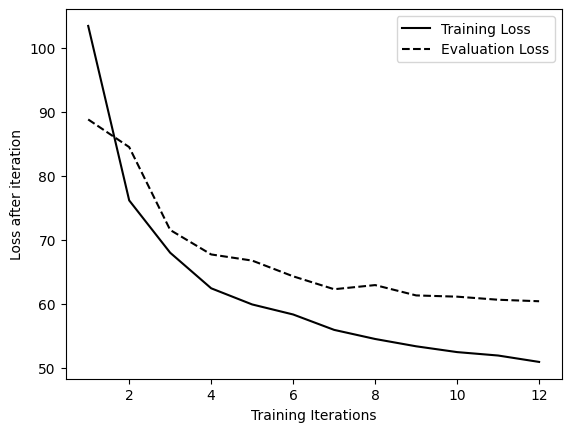

In [ ]:

# over  epochs 
## plotting loss 
import matplotlib.pyplot as plt
name_to_save = "losses_discriminator_2_cont"

epochs = list(range(1,num_epochs+1))

plt.plot(epochs, overall_loss_values, color = "black")
plt.plot(epochs, overall_loss_values_eval, color = "black", linestyle='dashed')
plt.legend(["Training Loss", "Evaluation Loss"], loc='upper right')
plt.xlabel("Training Iterations")
plt.ylabel("Loss after iteration")
##plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/{name_to_save}.png')
plt.show()

In [ ]:
#saving the model 
model_save_name = 'discriminator_2_cont2.pth'

path ="/content/gdrive/My Drive/Thesis/Models/{}".format(model_save_name)
torch.save(model, path)


In [ ]:
name_to_save = "losses_disc_2_cont"
df_losses_1 = pd.DataFrame({"loss_eval": overall_loss_values_eval, "loss_train": overall_loss_values })
df_losses_1.to_csv(f"/content/gdrive/My Drive/Thesis/loss_data/{name_to_save}.csv", index = False)

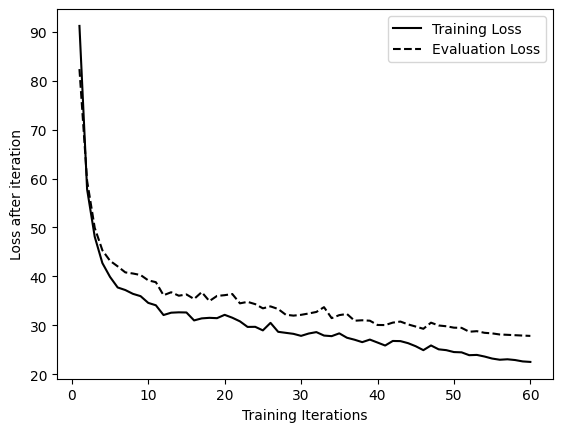

In [ ]:

# over  epochs 
## plotting loss 
import matplotlib.pyplot as plt
name_to_save = "losses_discriminator_2_cont"

epochs = list(range(1,num_epochs+1))

plt.plot(epochs, overall_loss_values, color = "black")
plt.plot(epochs, overall_loss_values_eval, color = "black", linestyle='dashed')
plt.legend(["Training Loss", "Evaluation Loss"], loc='upper right')
plt.xlabel("Training Iterations")
plt.ylabel("Loss after iteration")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/{name_to_save}.png')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
#model_save_name = 'discriminator_2_cont.pth'
#path ="/content/gdrive/My Drive/Thesis/Models/{}".format(model_save_name)

#model = torch.load(path)


In [ ]:
# images, names, des, tabular data, proxies, review_diff, ids  

In [ ]:
## also saving predictions with real names!
device = "cuda"

ids = []
preds_ = []
Ys = []

with torch.no_grad():
  for batch in dl_eval:

    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[5]).to(device)
    pred = model(img, name, joint_des, X)
    

    ids.extend(batch[6])
    preds_.extend(pred.cpu().numpy() )

    Ys.extend(Y.cpu().numpy() )
  

preds = [a[0] for a in preds_ ]

pred_disc_2_cont_real_name = pd.DataFrame({"id": ids, "pred": preds, "Y": Ys})
pred_disc_2_cont_real_name.to_csv("/content/gdrive/My Drive/Thesis/Discriminator_Predictions/pred_disc_2_cont_real_name.csv", index = False)

<ipython-input-26-799c66436b54>:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  list_images  = torch.tensor(list_images, dtype=torch.float32)
<ipython-input-31-6ae5873fcc45>:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encoded_des = torch.tensor(des_encoded)
<ipython-input-31-6ae5873fcc45>:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encoded_name = torch.tensor(name_encoded)


In [ ]:
pred_disc_2_cont_real_name

,id,pred,Y
0,41712,12.440921,11.0
1,41445,1.071669,0.0
2,51830,0.568563,0.0
3,55706,0.815354,1.0
4,72913,0.723349,0.0
...,...,...,...
6745,54408307,24.360452,39.0
6746,54378165,9.971351,14.0
6747,54395872,6.685459,6.0
6748,54396292,2.777407,3.0


Checking for bias of the model

In [ ]:
np.mean(pred_disc_2_cont_real_name.pred - pred_disc_2_cont_real_name.Y)

## really low bias - nice !!

-0.010853691056922639

### With categorical outcome

In [ ]:
output_dim = 3 ## here
final_output_dim_text_name = 5
final_output_dim_text_des = 5
final_output_dim_visual = 5

model = NeuralNetwork2( model_vit, tab_input_dim, final_output_dim_visual, final_output_dim_text_name, final_output_dim_text_des, hidden_dim_1, hidden_dim_2, hidden_dim_3, hidden_dim_4, output_dim)

learning_rate = 0.003
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) ## adam

In [ ]:
from transformers import get_scheduler

accelerator = Accelerator()
model, optimizer, dl_train, dl_eval = accelerator.prepare(
    model, optimizer, dl_train, dl_eval
)

num_update_steps_per_epoch = len(dl_train)
num_epochs = 20

num_training_steps = num_epochs * num_update_steps_per_epoch


lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,     ## one might also alter this!
    num_training_steps=num_training_steps,
)


device = "cuda"
model = model.to(device)

In [ ]:

overall_loss_values = []
overall_loss_values_eval = []


progress_bar = tqdm(range(num_training_steps))

for epoch in range(num_epochs):

  loss_values = []
  loss_values_eval = []

  model.train()

  for batch in dl_train:

    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[4]).to(device) ## idx of 4 here
    optimizer.zero_grad()
    pred = model(img, name, joint_des, X)
    loss = loss_fn(pred.squeeze(), Y)
    loss_values.append(loss.item())
    accelerator.backward(loss)
    
    optimizer.step()
    lr_scheduler.step()
    progress_bar.update(1)

 #   print(f"mean of train loss: {str(np.mean(loss_values))}")

  model.eval()

  with torch.no_grad():
    for batch in dl_eval:

      img = batch[0].to(device)
      name = torch.tensor(batch[1]).to(device)
      joint_des = torch.tensor(batch[2]).to(device)
      X = batch[3].to(device)
      Y = torch.tensor(batch[4]).to(device)
      optimizer.zero_grad()
      pred = model(img, name, joint_des, X)
      loss = loss_fn(pred.squeeze(), Y)
      loss_values_eval.append(loss.item())


#      print(f"mean of eval loss: {str(np.mean(loss_values_eval))}")


  overall_loss_values.append(np.mean(loss_values))
  overall_loss_values_eval.append(np.mean(loss_values_eval))

  print(f"Iteration No {str(epoch + 1)}")
  print(f"Train Loss: {str(np.mean(loss_values))}")
  print(f"Eval Loss: {str(np.mean(loss_values_eval))}")
  print("---------------------")


In [ ]:
#saving the model 
model_save_name = 'discriminator_2_cat.pth'

path ="/content/gdrive/My Drive/Thesis/Models/{}".format(model_save_name)
torch.save(model, path)


In [ ]:
name_to_save = "losses_disc_2_cat"
df_losses_1 = pd.DataFrame({"loss_eval": overall_loss_values_eval, "loss_train": overall_loss_values })
#df_losses_1.to_csv(f"/content/gdrive/My Drive/Thesis/loss_data/{name_to_save}.csv", index = False)

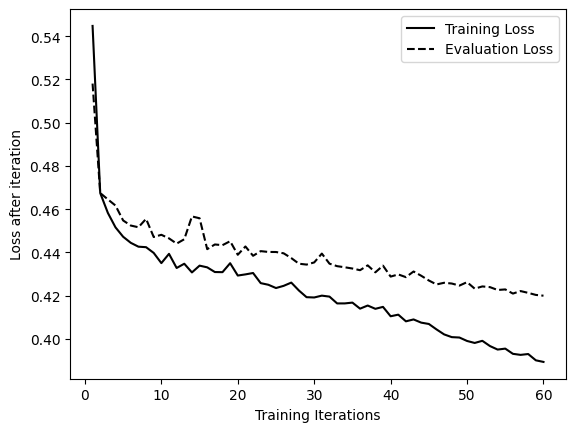

In [ ]:
# over  epochs 
## plotting loss 
import matplotlib.pyplot as plt
name_to_save = "losses_discriminator_2_cat"

epochs = list(range(1,num_epochs+1))

plt.plot(epochs, overall_loss_values, color = "black")
plt.plot(epochs, overall_loss_values_eval, color = "black", linestyle='dashed')
plt.legend(["Training Loss", "Evaluation Loss"], loc='upper right')
plt.xlabel("Training Iterations")
plt.ylabel("Loss after iteration")
#plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/{name_to_save}.png')
#plt.show()

In [ ]:
### obtaining classification report 

argmax_labels = []
argmax_preds = []
labels = [0,1,2]

with torch.no_grad():
  for batch in dl_eval:
    X = batch[1]
    Y = torch.tensor(batch[2])
    pred = model(X)
    argmax_labels.extend( list(np.argmax(Y.numpy(), axis = 1) ))    
    argmax_preds.extend( list(np.argmax(pred.numpy(), axis = 1) ))  

report = classification_report(y_true=argmax_labels, y_pred=argmax_preds, labels=labels, output_dict = True)
print("Weighted Avg Classification Results:")
print(report['weighted avg'])


<ipython-input-58-b0a07fa5ec5e>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(batch[2])


Weighted Avg Classification Results:
{'precision': 0.808882833782141, 'recall': 0.8317037037037037, 'f1-score': 0.8129671118121731, 'support': 6750}


In [ ]:
## getting preds with real names 


ids = []
preds = []
Ys = []

with torch.no_grad():
  for batch in dl_eval:
    
    img = batch[0].to(device)
    name = torch.tensor(batch[1]).to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[4]).to(device)
    pred = model(img, name, joint_des, X)

    cat_pred = [i+1 for i in np.argmax(pred.cpu().numpy()[0], axis = 1)]
    Y_ = [int(i+1) for i in np.argmax(batch[2], axis = 1)]
    

    ids.extend(batch[6])
    preds_.extend(pred.cpu().numpy() )

    Ys.extend(Y.cpu().numpy() )
  


In [ ]:
pred_disc_2_cat_real_name = pd.DataFrame({"id": ids, "pred": preds, "Y": Ys})
pred_disc_2_cat_real_name.to_csv("/content/gdrive/My Drive/Thesis/Discriminator_Predictions/pred_disc_2_cat_real_name.csv", index = False)

In [ ]:
pred_disc_2_cat_real_name

,id,pred,Y
0,41712,3,3
1,41445,1,1
2,51830,1,1
3,55706,1,2
4,72913,1,1
...,...,...,...
6745,54408307,3,3
6746,54378165,3,3
6747,54395872,3,3
6748,54396292,2,2


## POC: Name has predictive power ?!


Lastly, a model without name as input feature shall be trained to determine if the name contains predictive power.

In [ ]:

## A model that does not take into accoutn the name

tab_input_dim = 31
final_output_dim_text_des = 5
final_output_dim_visual = 5

hidden_dim_1 = 60
hidden_dim_2 = 60
hidden_dim_3 = 60
hidden_dim_4 = 20
output_dim = 1


## name, des / text model 


class NeuralNetwork_no_name(nn.Module): ## without extractor
    def __init__(self, model_vit, tab_input_dim, final_output_dim_visual, final_output_dim_text_des, hidden_dim_1, hidden_dim_2, hidden_dim_3, hiddem_dim_4, output_dim):
        super(NeuralNetwork_no_name, self).__init__()

        self.model_vit = model_vit
        for param in self.model_vit.parameters():
          param.requires_grad = False

        # layers build on top of visual model before concatination 
        self.visual_add_layer_1 = torch.nn.Linear(in_features=768, out_features=20)
        self.visual_add_layer_2 = torch.nn.Linear(in_features=20, out_features=4)
        # flattening / torch.flatten(-, start_dim = 1)
        self.visual_add_layer_3 = torch.nn.Linear(in_features=788, out_features=50)
        self.visual_add_layer_4 = torch.nn.Linear(in_features=50, out_features=final_output_dim_visual) ## concat after this layer of dim Batch Size x final_output_dim_visual
        

        # Layers added after Description 
        self.des_added_layer_1 = nn.Linear(768, 100)
        self.des_added_layer_2 = nn.Linear(100, 100)
        ### dropout ## 
        self.des_added_layer_3 = nn.Linear(100, 50)
        self.des_added_layer_4 = nn.Linear(50, final_output_dim_text_des)


        ### Layers added after Joint Description ### 

        # dimension after concat operation
        self.concat_dim = tab_input_dim + final_output_dim_visual + final_output_dim_text_des

        # layers processing input after concatination 
        self.layer_1 = nn.Linear(self.concat_dim, hidden_dim_1)
        self.layer_2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.layer_3 = nn.Linear(hidden_dim_2, hidden_dim_3)
        self.layer_4 = nn.Linear(hidden_dim_3, hidden_dim_4)
        self.layer_5 = nn.Linear(hidden_dim_4, output_dim)
        self.dropout = nn.Dropout(0.03) 

       
    def forward(self, img, des_encoded, X):  ## name, des

        ## firstly processing outputs of visual and textual model ##

        # visual model 
        output_img = self.model_vit(img)
        output_img = torch.nn.functional.tanh(self.visual_add_layer_1(output_img.last_hidden_state))
        output_img = self.dropout(output_img)
        output_img = torch.nn.functional.tanh(self.visual_add_layer_2(output_img))
        output_img = torch.flatten(output_img, start_dim = 1)
        output_img = torch.nn.functional.tanh(self.visual_add_layer_3(output_img))
        final_output_img = torch.nn.functional.tanh(self.visual_add_layer_4(output_img))

        # textual - description 
        encoded_des = torch.tensor(des_encoded)
        encoded_des = torch.nn.functional.tanh(self.des_added_layer_1(encoded_des))
        encoded_des = self.dropout(encoded_des)
        encoded_des = torch.nn.functional.tanh(self.des_added_layer_2(encoded_des))
        encoded_des = self.dropout(encoded_des)
        encoded_des = torch.nn.functional.tanh(self.des_added_layer_3(encoded_des))
        final_encoded_des = torch.nn.functional.tanh(self.des_added_layer_4(encoded_des))

        # concatination #
        x = torch.cat((final_output_img, final_encoded_des, X), 1)

        ## processing of joint representation ## 
        x = torch.nn.functional.tanh(self.layer_1(x))
        x = torch.nn.functional.tanh(self.layer_2(x))
        x = self.dropout(x)
        x = torch.nn.functional.tanh(self.layer_3(x))
        x = self.dropout(x)
        x = torch.nn.functional.tanh(self.layer_4(x))
        x = self.layer_5(x)

        return x

In [ ]:
output_dim = 1 ## here

model = NeuralNetwork_no_name( model_vit, tab_input_dim, final_output_dim_visual, final_output_dim_text_des, hidden_dim_1, hidden_dim_2, hidden_dim_3, hidden_dim_4, output_dim)

learning_rate = 0.0035 ## found to be working well here
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) ## adam

In [ ]:
from transformers import get_scheduler

accelerator = Accelerator()
model, optimizer, dl_train, dl_eval = accelerator.prepare(
    model, optimizer, dl_train, dl_eval
)

num_update_steps_per_epoch = len(dl_train)
num_epochs = 60

num_training_steps = num_epochs * num_update_steps_per_epoch


lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,     ## one might also alter this!
    num_training_steps=num_training_steps,
)


In [ ]:
overall_loss_values = []
overall_loss_values_eval = []

progress_bar = tqdm(range(num_training_steps))

for epoch in range(num_epochs):

  loss_values = []
  loss_values_eval = []

  model.train()

  for batch in dl_train:

    img = batch[0].to(device)
    joint_des = torch.tensor(batch[2]).to(device)
    X = batch[3].to(device)
    Y = torch.tensor(batch[5]).to(device)
    optimizer.zero_grad()
    pred = model(img, joint_des, X)
    loss = loss_fn(pred.squeeze(), Y)
    loss_values.append(loss.item())
    accelerator.backward(loss)
    
    optimizer.step()
    lr_scheduler.step()
    progress_bar.update(1)

  model.eval()

  with torch.no_grad():
    for batch in dl_eval:

      img = batch[0].to(device)
      joint_des = torch.tensor(batch[2]).to(device)
      X = batch[3].to(device)
      Y = torch.tensor(batch[5]).to(device)
      optimizer.zero_grad()
      pred = model(img, joint_des, X)
      loss = loss_fn(pred.squeeze(), Y)
      loss_values_eval.append(loss.item())

  overall_loss_values.append(np.mean(loss_values))
  overall_loss_values_eval.append(np.mean(loss_values_eval))


In [ ]:
name_to_save = "losses_disc_2_cont_no_name"
df_losses_1 = pd.DataFrame({"loss_eval": overall_loss_values_eval, "loss_train": overall_loss_values })
df_losses_1.to_csv(f"/content/gdrive/My Drive/Thesis/loss_data/{name_to_save}.csv", index = False)

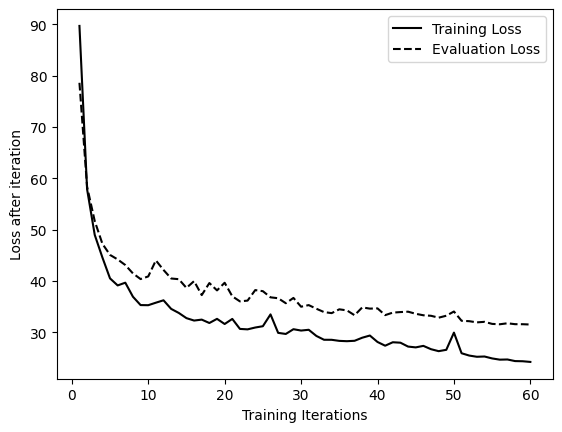

In [ ]:
import matplotlib.pyplot as plt
name_to_save = "losses_disc_2_cont_no_name"

epochs = list(range(1,num_epochs+1))

plt.plot(epochs, overall_loss_values, color = "black")
plt.plot(epochs, overall_loss_values_eval, color = "black", linestyle='dashed')
plt.legend(["Training Loss", "Evaluation Loss"], loc='upper right')
plt.xlabel("Training Iterations")
plt.ylabel("Loss after iteration")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/{name_to_save}.png')
plt.show()

When comparing the losses (see the pic of the losses which is a copy from the loss image from above), it becomes apparent that the losses of the model that incorporates the name is slightly lower

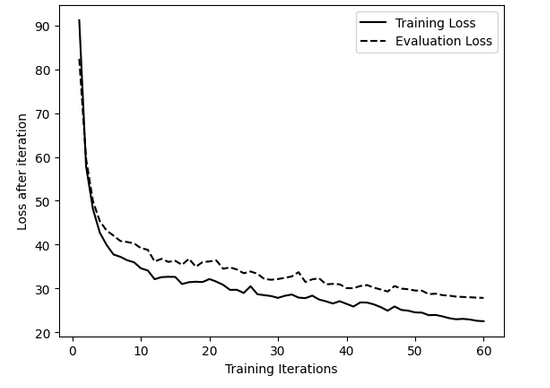